# Programa de Ajuste Lineal por Mínimos Cuadrados

Importamos los paquetes necesarios

In [60]:
import numpy as np

from numpy.linalg import *

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, Latex

import pandas as pd
pd.set_option('precision', 2)

La función de ajuste $y_i = a + b x_i$  pide tres listas de argumentos $\{ x_i, y_i \}$, y $\sigma_i = \sigma (y_i)$ donde  $i=1,...,n$ 

La minimización conduce al problema algebráico 
$$\left( \begin{array}{c} a \\ b \end{array} \right) = H^{-1} Z$$
donde
$$
H = \left( \begin{array}{cc} \sum_i \frac{1}{\sigma_i^{2}} & \sum_i \frac{x_i}{\sigma_i^2} \\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x^2_i}{\sigma_i^2}
\end{array}
\right) ~~~; ~~~~  
Z = \frac{1}{\Delta}\left( \begin{array}{c} \sum_i\frac{x_i^2}{\sigma_i^2} \\  
 \sum_i\frac{1}{\sigma_i^2} \end{array}
\right)
$$
con $\Delta= \det H$.
Además, las desviaciones estándar de $a$ y $b$ son 
$$
\sigma(a) =\sqrt{ \frac{1}{\Delta} \sum_i \frac{x_i^2}{\sigma_i^2}} ~~~; ~~~
\sigma(b) =\sqrt{ \frac{1}{\Delta} \sum_i \frac{1}{\sigma_i^2}}\, .
$$

In [100]:
def media(xlist):
    return sum(xlist)/len(xlist)

def sigma(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1.)))

def sigmab(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1)))

def utotal(ua,ub):
    return np.sqrt(ua**2+ub**2)

#ajuste lineal y=a+bx
def ajustelinealponderado(x,y,sig):

    H=np.array([[sum(1./sig**2),sum(x/sig**2)],[sum(x/sig**2),sum(x**2/sig**2)]])
    Delta=det(H)
    w=1.0/(sig*sig)
    Z=np.array([sum(y/sig**2),sum((x*y)/sig**2)])
    
    ([a,b])=np.matmul(inv(H),Z)
    
    siga=np.sqrt(sum(x**2/sig**2)/Delta)
    sigb=np.sqrt(sum(1./sig**2)/Delta)
    r=(sum(w) * sum(w*x*y) - sum(w*x) * sum(w*y))/(np.sqrt ((sum(w) * sum(w*x*x) - sum(w*x) **2 )*( sum(w) * sum(w*y*y) - sum(w*y) **2)))
    
    return a,b,siga,sigb,r


## En esta celda introducimos nuestros datos $\{ x_i, y_i \}$, $i=1,...,n$

In [62]:
x=np.array([9.451,18.902,28.353,37.804,47.255,56.706,66.157,75.608,85.059,94.51,103.961,113.412,122.863,132.314
])
y=np.array([ 2.901421594,2.879198457,2.797281335,2.740840024,2.681021529,2.58021683,2.517696473,2.397895273,2.282382386,2.197224577,2.104134154,1.974081026,1.757857918,1.335001067
  ])
n=len(x)

datos = pd.DataFrame({'x': x, 'y': y},index=np.arange(n)+1)
display(datos)

,x,y
1,9.45,2.90
2,18.90,2.88
3,28.35,2.80
4,37.80,2.74
5,47.26,2.68
6,56.71,2.58
7,66.16,2.52
8,75.61,2.40
9,85.06,2.28
10,94.51,2.20


In [63]:
cadena  = '\\begin{array}{|r|r|} \hline x & y \\\\ \hline'
for i in range(10):
    cadena += '%3.2f & %3.2f \\\\' % (x[i],y[i])
cadena += '\hline \end{array}'

display(Latex(cadena))

<IPython.core.display.Latex object>

calculemos la media $\bar y = \frac{1}{n}(\sum_{i=1}^n y_i)$, y la desviación estándar de la media poblacional, que es aproximada por el estimador   $u_A=\sigma(\bar y) = \sqrt{\frac{\sum_{i=1}^n (y_i - \bar y)^2}{n(n-1)}}$

In [64]:
ymed=media(y)
display(Latex(r'$ \bar{y} =%i $' % ymed))

<IPython.core.display.Latex object>

In [6]:
sigbar=sigmab(y)
display(Latex(r'$\sigma(\bar y)=%i $' % sigbar))

<IPython.core.display.Latex object>

en caso de ser conocida, la desviación estándar de cada dato es  $\sigma(y_i)$. En el ejemplo 3.18 del manual   $\sigma(y_i) = \sqrt{y_i}$ 

In [7]:
sigi=np.sqrt(y)

escogemos cuál de las dos es la que vamos a usar en el ajuste sigma = sigbar o sigma = sigi

In [9]:
uy=(0.2/np.sqrt(3))/y

In [10]:
datossig = pd.DataFrame({'x': x,'y': y ,'sig': uy},index=np.arange(n)+1)
display(datossig)

,sig,x,y
1,0.04,9.45,2.90
2,0.04,18.90,2.88
3,0.04,28.35,2.80
4,0.04,37.80,2.74
5,0.04,47.26,2.68
6,0.04,56.71,2.58
7,0.05,66.16,2.52
8,0.05,75.61,2.40
9,0.05,85.06,2.28
10,0.05,94.51,2.20


### Llamamos a la funcion de ajuste

In [103]:
a,b,siga,sigb,r = ajustelinealponderado(x,y,uy)

display(Latex('$a$=%3.6f , $\sigma_{a}$=%3.6f' % (a,siga) ))
display(Latex('$b$=%3.6f , $\sigma_{b}$=%3.6f' % (b,sigb) ))
display(Latex('$b$=%.6f'%(r)))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Graficamos los datos y la curva obtenida

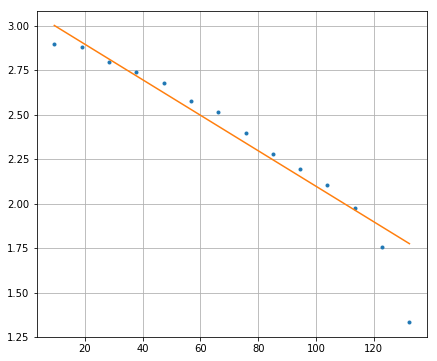

In [59]:
Y= a + b*x

plt.figure(figsize=(7,6))
plt.plot(x,y, '.')
plt.plot(x,Y)
plt.grid()
plt.show()

también podemos graficar con las barras de error

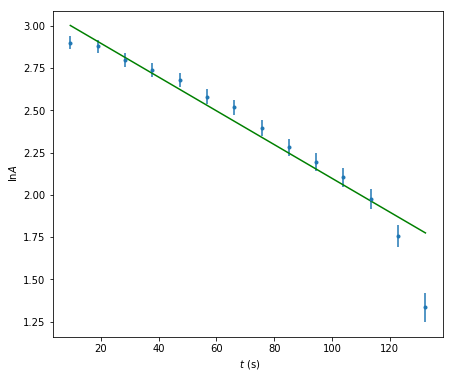

In [58]:
plt.figure(figsize=(7,6))
plt.errorbar(x, y, yerr=uy,fmt= '.')
plt.plot(x,Y,'g-')
plt.legend(loc="upper right")
plt.xlabel(r' $t$ $\mathrm{(s)} $')
plt.ylabel(r'$\ln A$')
plt.savefig("fig.pdf")
